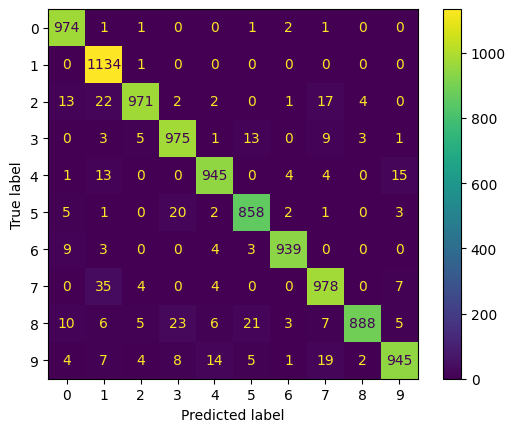

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier
from sklearn.neighbors import KNeighborsRegressor as kNNRegressor
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

#Change dtype of values in x_train and x_test to float32.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize x_train and x_test in range of [0; 1].
x_train /= 255
x_test /= 255


#Initialize kNN Classification model.
algorithm = 'brute'
'''
    minkowski the same result as euclidean
    chebyshev out of time
    manhattan in 1100 situation has 2 more good results than minkowski and euclidean but
       time is 2 times more than minkowski and euclidean 
'''
#metric = 'minkowski' 
#metric = 'chebyshev'
metric = 'manhattan'
k = 4 
model = kNNClassifier(n_neighbors = k, algorithm = algorithm, metric = metric)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test) #All test predictions
#plt.imshow(x_test[200].reshape(28, 28), cmap = 'gray')
#plt.show()
#print(f"image class = {y_test_pred[200]}")
labels_test = np.sort(np.unique(y_test))
cm_vals_test = confusion_matrix(y_test, y_test_pred, labels = labels_test)
cm_plot_test = ConfusionMatrixDisplay(confusion_matrix = cm_vals_test, display_labels = labels_test)
cm_plot_test.plot()
plt.show()










